<a href="https://colab.research.google.com/github/vengadam2001/python/blob/master/audio%20opperation%20and%20%20frequency%20opperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
 
import wave
 
import struct
 
import matplotlib.pyplot as plt
 
# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000.0
 
amplitude = 16000
 
file = "test.wav"

In [0]:
sine_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]

In [0]:
nframes=num_samples
 
comptype="NONE"
 
compname="not compressed"
 
nchannels=1
 
sampwidth=2

In [0]:
wav_file=wave.open(file, 'w')

wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))

In [0]:
for s in sine_wave:
   wav_file.writeframes(struct.pack('h', int(s*amplitude)))

In [0]:
frame_rate = 48000.0
 
infile = "test.wav"
 
num_samples = 48000
 
wav_file = wave.open(infile, 'r')
 
data = wav_file.readframes(num_samples)
 
wav_file.close()

In [0]:
data = struct.unpack('{n}h'.format(n=num_samples), data)

In [0]:
data = np.array(data)

In [0]:
data_fft = np.fft.fft(data)

In [0]:

frequencies = np.abs(data_fft)

In [15]:
print("The frequency is {} Hz".format(np.argmax(frequencies)))

The frequency is 1000 Hz


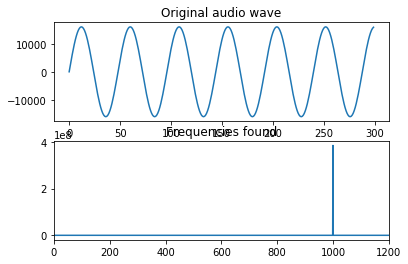

In [16]:
plt.subplot(2,1,1)

plt.plot(data[:300])

plt.title("Original audio wave")

plt.subplot(2,1,2)

plt.plot(frequencies)

plt.title("Frequencies found")

plt.xlim(0,1200)

plt.show()

In [0]:
#creating a new audio fiel with noise

In [0]:
# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
noisy_freq = 50
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000.0

In [0]:
#Create the sine wave and noise
 
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
 
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
 
#Convert them to numpy arrays
 
sine_wave = np.array(sine_wave)
 
sine_noise = np.array(sine_noise)

In [0]:

combined_signal = sine_wave + sine_noise

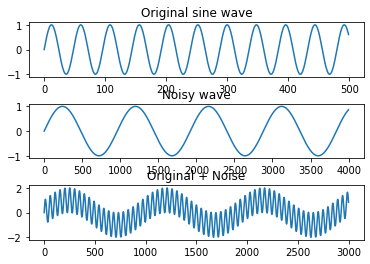

In [21]:
plt.subplot(3,1,1)
 
plt.title("Original sine wave")
 
# Need to add empty space, else everything looks scrunched up!
 
plt.subplots_adjust(hspace=.5)
 
plt.plot(sine_wave[:500])
 
plt.subplot(3,1,2)
 
plt.title("Noisy wave")
 
plt.plot(sine_noise[:4000])
 
plt.subplot(3,1,3)
 
plt.title("Original + Noise")
 
plt.plot(combined_signal[:3000])
 
plt.show()

In [0]:
data_fft = np.fft.fft(combined_signal)
 
freq = (np.abs(data_fft[:len(data_fft)]))

(0, 1200)

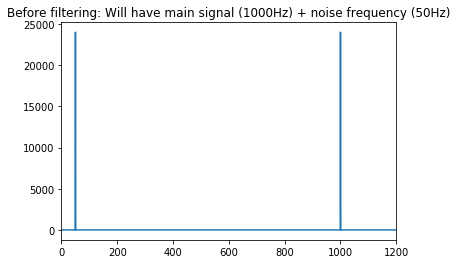

In [23]:
plt.plot(freq)
 
plt.title("Before filtering: Will have main signal (1000Hz) + noise frequency (50Hz)")
 
plt.xlim(0,1200)

In [0]:
filtered_freq = []
index = 0

In [0]:
for f in freq:
    # Filter between lower and upper limits
    # Choosing 950, as closest to 1000. In real world, won't get exact numbers like these
    if index > 950 and index < 1050:
        # Has a real value. I'm choosing >1, as many values are like 0.000000001 etc
        if f > 1:
            filtered_freq.append(f)
 
        else:
            filtered_freq.append(0)
    else:
        filtered_freq.append(0)
index += 1

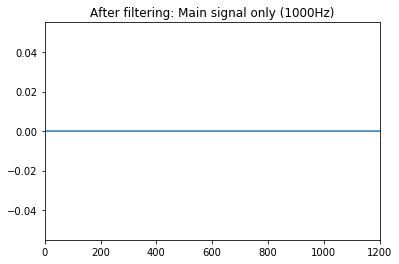

In [28]:
plt.plot(filtered_freq)
 
plt.title("After filtering: Main signal only (1000Hz)")
 
plt.xlim(0,1200)
 
plt.show()
 
plt.close()